In [1]:
# Kenneth Meyer
# 9/19/22
# CSE 383C hw2 - coding portions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd

In [3]:
######## functions for 4.3 ##########
def compute_and_plot(A):
    """
        input: real matrix A
        
        computes its SVD, plotting v1, v2 (right singular vectors) in unit circle and 
        left singular vectors u1 and u2 in an ellipse (figure 4.1 of textbook) 
    
    
    """
    # compute SVD, save columns of U and V to u1, u2 and v1, v2
    U,S,Vh = svd(A)
    #print(U)
    #print(Vh)
    # guaranteed to be 2x2
    u1 = U[:,0]
    u2 = U[:,1]
    # Vh is transpose!!
    v1 = Vh[0,:]
    v2 = Vh[1,:]
    sigma1 = S[0]
    sigma2 = S[1]

    # generate data for unit circle and ellipse to plot alongside vectors
    # circle
    theta = np.linspace(0,2*np.pi,100)
    r = 1
    x_circle = r*np.cos(theta)
    y_circle = r*np.sin(theta)
    s1u1 = sigma1*u1
    s2u2 = sigma2*u2
    # ellipse
    a = np.linalg.norm(s1u1)
    b = np.linalg.norm(s2u2)
    phi = np.arcsin(s1u1[1]/a) # angle axis a makes with x axis
    #print(phi)
    #print(s1u1)
    ### don't think there should be a rotation for [[2,0],[0,3]]
    c = np.cos(phi)
    s = np.sin(phi)
    R = np.array([[c, -1 * s],[s, c]])
    pts = np.zeros((2,len(theta)))
    pts[0,:] = a * np.cos(theta)
    pts[1,:] = b * np.sin(theta)

    pts_rotated = R @ pts

    # plot everything
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.suptitle("Unit circle and ellipse for right and left singular vectors of A")
    ax1.plot(x_circle,y_circle)
    ax1.plot([0,v1[0]],[0,v1[1]]) # axes of largest singular value
    ax1.plot([0,v2[0]],[0,v2[1]]) # axes of smallest singular value
    ax1.set_aspect('equal', adjustable='box')
    ax1.set_xlim(xmin=-3,xmax=3)
    ax1.set_ylim([-3,3])
    ax1.margins(2,2)
    ax1.legend(["unit circle","$v_1$","$v_2$"],loc = "lower center",bbox_to_anchor=(0.5, -0.5))
    ax1.set_title("SVD on unit Circle")

    u1s1_mat = np.array([[0,s1u1[0]],[0,s1u1[1]]])
    u2s2_mat = np.array([[0,s2u2[0]],[0,s2u2[1]]])
    
    u1s1_rot = u1s1_mat @ R
    u2s2_rot = u2s2_mat @ R

    ax2.plot(pts_rotated[0,:],pts_rotated[1,:])
    #ax2.plot([0,s1u1[0]],[0,s1u1[1]]) # axes of largest singular value
    #ax2.plot([0,s2u2[0]],[0,s2u2[1]]) # axes of smallest singular value
    ax2.plot(u1s1_mat[0,:],u1s1_mat[1,:])
    ax2.plot(u2s2_mat[0,:],u2s2_mat[1,:])
    ax2.set_aspect('equal', adjustable='box')
    ax2.set_title("SVD under transformation by A")
    ax2.legend(["Ellipse", "$\sigma_1u_1$","$\sigma_2u_2$"],loc="lower center",bbox_to_anchor=(0.5, -0.5))
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_ylim(ax1.get_ylim())

    #fig.subplots_adjust(bottom=0.25)
    plt.show()

## 3.7 Matrix

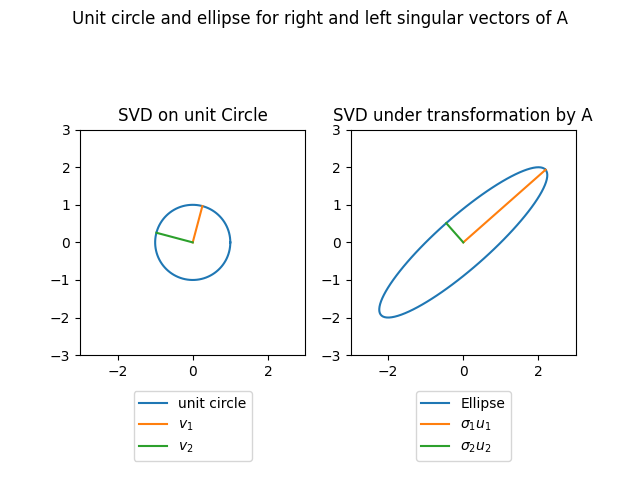

In [4]:
%matplotlib widget
A_3_7 = np.array([[1,2],[0,2]])
compute_and_plot(A_3_7)

## 4.1a

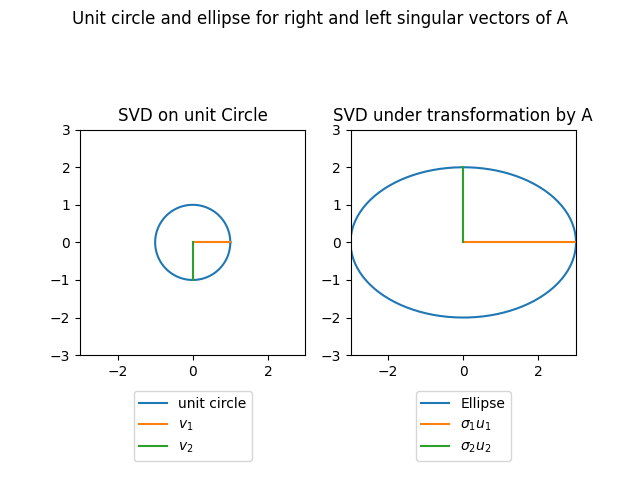

In [5]:
A_41a = np.array([[3,0],[0,-2]])
compute_and_plot(A_41a)

## 4.1b

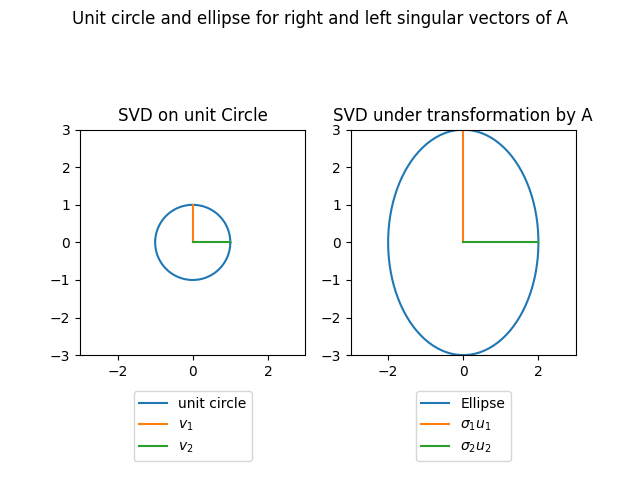

In [6]:
A_41b = np.array([[2,0],[0,3]])
compute_and_plot(A_41b)

## 4.1d

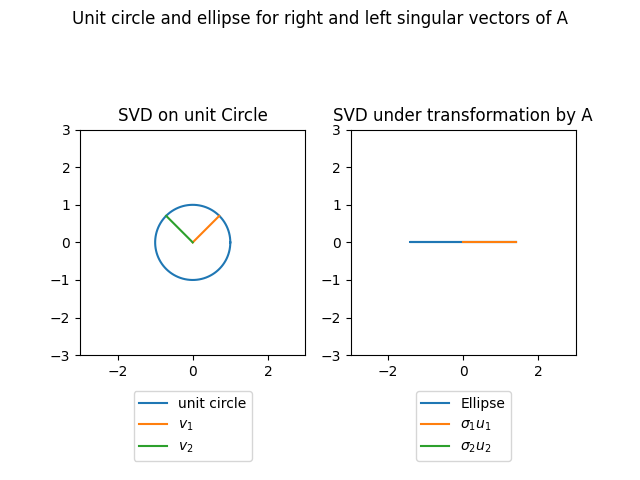

In [7]:
A_41d = np.array([[1,1],[0,0]])
compute_and_plot(A_41d)

## 4.1e

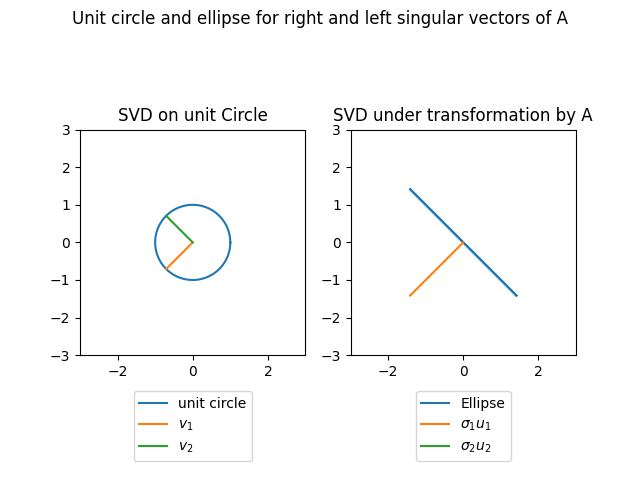

In [8]:
A_41e = np.ones((2,2))
compute_and_plot(A_41e)